# Debugging QuantiCam.jl

- [ ] Firmware written on the board
- [ ] Test signals validated
- [ ] Run Matlab test for comparison
- [ ] Record test leads logical values and compare to QC.jl
- [ ] Add visualization toolbox
- [ ] Write experiment test scripts

In [1]:
using QuantiCam

## Setup connection to the QC FPGA
- Write FW
- Config voltages
- Config sensor settings for the mode we use

In [5]:
if (@isdefined qc) && qc!== nothing
    #QuantiCam.sensor_disconnect(qc)
    QuantiCam.cleanup(qc)
end
qc = QCBoard("../hw/TOP_7310_modes_1_2.bit", "../config/tcspc.json")
init_board!(qc)

[ Info: Opal Kelly to API Comms setup in progress...


Scanning USB for Opal Kelly devices...
Found 1 Opal Kelly device(s)
Serial number of device 0 is 1908000OVV


[ Info: Device opened with id=Opal Kelly XEM7310 and board model=ok_brdXEM7310A200
[ Info: Located bit file ../hw/TOP_7310_modes_1_2.bit
[ Info: Firmware written successfuly
[ Info: Waiting on voltages to stabilize
[ Info: Connected to Sensor
[ Info: Initialize logic parameters necessary to interact with the sensor
[ Info: Reset sensor and set parameters for the MODE of use
[ Info: Sensor configured


## Capture

Next we have a few different methods to read from the sensor and display or save the data

### One frame visualize
Just read one frame and display it

In [40]:
println("Reading a frame with el_size=$(QuantiCam.element_size(qc)) and frame_size=$(QuantiCam.frame_size(qc))")
frame = QuantiCam.capture_raw(qc);
size(frame)

Reading a frame with el_size=1 and frame_size=24576


[ Info: Reading block packet_size=256, frame_size=24576


(24576,)

In [ ]:
row_pairs = QuantiCam.partition_row_pairs(frame, qc.config.rows, qc.config.cols; el_size=element_size(qc))
function filter_code(tdc_pixels::Union{Array{UInt8}, Array{UInt16}})
  nan_boxed_pixels = similar(tdc_pixels, Float32)
  nan_boxed_pixels = map(x-> if(x==0x04) missing else Float32(x) end, tdc_pixels)
  nan_boxed_pixels
end
filter_code(frame)  

24576-element Vector{Union{Missing, Float32}}:
   0.0
   0.0
   1.0
 128.0
    missing
  60.0
    missing
    missing
    missing
    missing
    missing
  20.0
    missing
   ⋮
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing

In [8]:
println(typeof(frame))
println(size(frame))
println(QuantiCam.element_size(qc))
println(size(row_pairs))
println(size(row_pairs[1]))
println(size(row_pairs[2]))

Vector{UInt8}
(24576,)
1
(96,)
(256,)
(256,)


In [9]:
marker_idx = findall(frame .== 0x80)
for idx in marker_idx
    println("Match at $idx header is: $(frame[idx-3:idx]))")
end

Match at 4 header is: UInt8[0x00, 0x00, 0x01, 0x80])
Match at 260 header is: UInt8[0x01, 0x00, 0x01, 0x80])
Match at 516 header is: UInt8[0x02, 0x00, 0x01, 0x80])
Match at 772 header is: UInt8[0x03, 0x00, 0x01, 0x80])
Match at 1028 header is: UInt8[0x04, 0x00, 0x01, 0x80])
Match at 1284 header is: UInt8[0x05, 0x00, 0x01, 0x80])
Match at 1540 header is: UInt8[0x06, 0x00, 0x01, 0x80])
Match at 1796 header is: UInt8[0x07, 0x00, 0x01, 0x80])
Match at 2052 header is: UInt8[0x08, 0x00, 0x01, 0x80])
Match at 2308 header is: UInt8[0x09, 0x00, 0x01, 0x80])
Match at 2564 header is: UInt8[0x0a, 0x00, 0x01, 0x80])
Match at 2820 header is: UInt8[0x0b, 0x00, 0x01, 0x80])
Match at 3076 header is: UInt8[0x0c, 0x00, 0x01, 0x80])
Match at 3332 header is: UInt8[0x0d, 0x00, 0x01, 0x80])
Match at 3588 header is: UInt8[0x0e, 0x00, 0x01, 0x80])
Match at 3844 header is: UInt8[0x0f, 0x00, 0x01, 0x80])
Match at 4100 header is: UInt8[0x10, 0x00, 0x01, 0x80])
Match at 4356 header is: UInt8[0x11, 0x00, 0x01, 0x80]

In [22]:
trig_pixels = findall(frame .!= 0x04)
findall(x->x==258, trig_pixels)

1-element Vector{Int64}:
 28

In [23]:
row_pairs .!=0x04

96-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

[ Info: Reading block packet_size=256, frame_size=24576


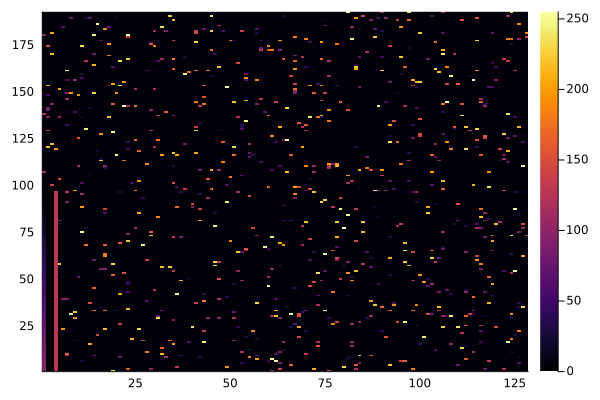

In [237]:
using Plots
frame = QuantiCam.capture_frame(qc)
heatmap(frame)

In [223]:
QuantiCam.reload_config(qc, "../config/tcspc.json")
QuantiCam.config_sensor(qc)

[ Info: Reset sensor and set parameters for the MODE of use
[ Info: Sensor configured


## TCSPC Histogram
- [ ] Aquire N tcspc frames
- [ ] Make histogram for each pixel

In [238]:
frames = QuantiCam.capture_frames(qc, 10000)
size(frames)

[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_size=24576
[ Info: Reading block packet_size=256, frame_siz

(10000,)

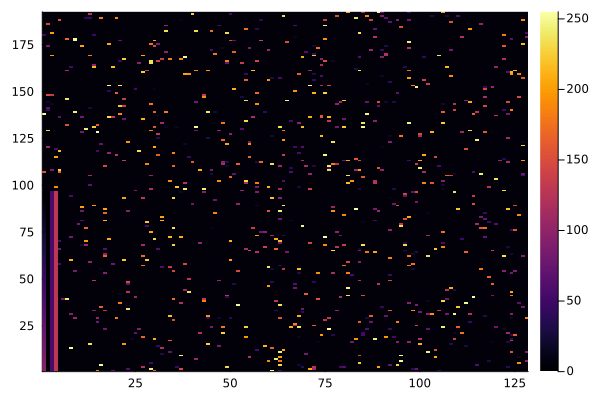

In [239]:
heatmap(frames[12])

In [253]:
using Statistics

function collect_frames(v::Vector{Matrix{T}}) where T
    n_rows = size(v[1], 1)
    n_cols = size(v[1], 2)
    n_matrices = length(v)
    
    result = Matrix{Vector{T}}(undef, n_rows, n_cols)
    
    for i in 1:n_rows, j in 1:n_cols
        result[i, j] = [v[k][i, j] for k in 1:n_matrices]
    end
    
    return result
end

tcspc_stream = collect_frames(frames)
tcspc_mean = mean(frames)
tcspc_var = var(frames)

192×128 Matrix{Float64}:
    0.0         0.0     5454.3     …   281.756   218.982      3.26332
    0.0         0.0     5454.3         452.933    96.0201    11.2461
    0.0         0.0     5454.3         330.254   145.994      7.0568
    0.0         0.0     5454.3         345.472   258.005     10.3101
    0.0         0.0     5454.3        6294.89    425.521   4716.69
    0.0         0.0     5454.3     …   449.052   182.708   5791.12
    0.0         0.0     5454.3         426.68    298.875     14.0721
    0.0         0.0     5454.3        6865.98    242.036     12.0825
    0.0         0.0     5454.3         333.549   155.785     19.0819
    0.0         0.0     5454.3         259.669  1280.6      175.27
    0.0         0.0     5454.3     …   290.747   237.734   7171.25
    0.0         0.0     5454.3         298.925   171.755    242.346
    0.0         0.0     5454.3         281.906   151.89      13.1896
    ⋮                              ⋱     ⋮                 
  140.91      179.52    60

In [ ]:
using SparseArrays
row_indices, col_indices = findnz(sparse(tcspc_var .> 500))
for (row, col) in zip(row_indices, col_indices)
    if (row> 50 && row < 100)
        println("$row, $col")
    end
end

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///home/cristi/Documents/Scripts/Julia/opal-kelly/QuantiCam/examples/In[266]#6:4\[90mIn[266]:6:4[0;0m]8;;\
    println("$row, $col")
end[48;2;120;70;70m[0;0m
[90m#  └ ── [0;0m[91mExpected `end`[0;0m

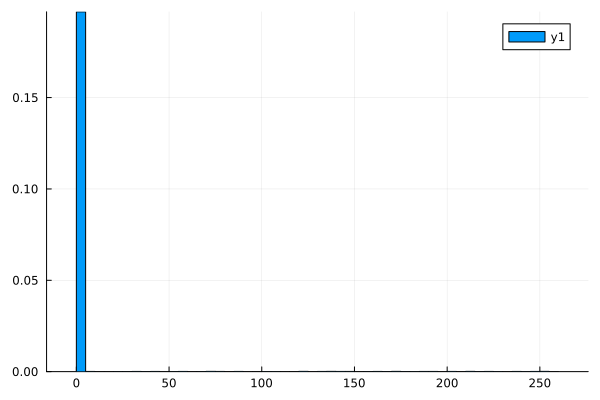

In [263]:
histogram(tcspc_stream[174, 3], bins=100, normalize=:pdf)

In [38]:
tcspc_stream[100,100]

10000-element Vector{UInt16}:
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
      ⋮
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004
 0x0004

In [222]:
(40e-2 / 3e8) * 10^9

1.3333333333333335